1. Using a Jupyter notebook, read in all sets of data (using pandas). Include answers to any
questions in your Jupyter notebook and this will be part of your homework submission

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

files = [
    'radiation_data.csv',
    'radiation_data2.csv',
    'radiation_data3.csv',
    'radiation_data4.csv',
    'radiation_dataW1.csv',
    'radiation_dataW2.csv',
    'radiation_dataW3.csv'
]
data_frames = [pd.read_csv(file) for file in files]


2. Plot histograms of the counts from each measurement for your first source all on the same
graph. How do the mean (μ) and standard deviation (σ) compare?
a. How do the measured standard deviations compare to the theoretical uncertainty you
would expect from counting statistics?
b. What general trend do you see in the counts measured as a function of the thickness of
absorber material?

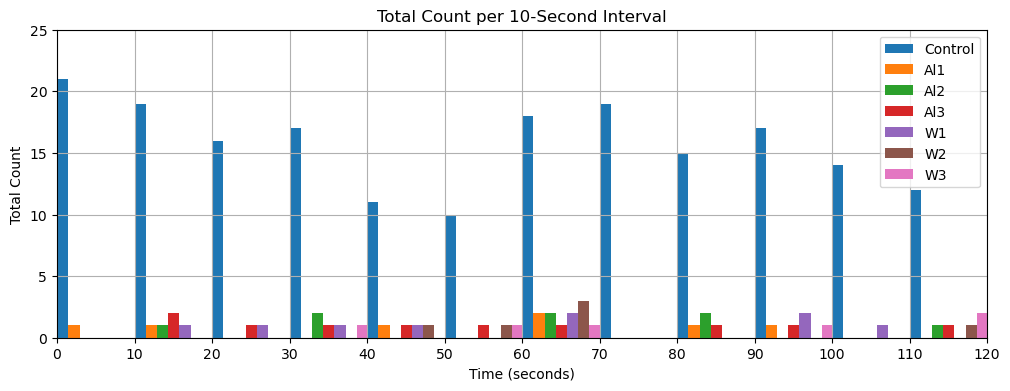

In [2]:
def process_data(df):
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    
    df['Time'] = (df['Timestamp'] - df['Timestamp'].iloc[0]).dt.total_seconds()
    
    df['Interval'] = (df['Time'] // 10).astype(int)
    
    df_binned = df.groupby('Interval')['Count'].sum().reset_index()
    
    return df_binned

processed_data = [process_data(df) for df in data_frames]

labels = ['Control', 'Al1', 'Al2', 'Al3', 'W1', 'W2', 'W3']

plt.figure(figsize=(12, 4))

bar_width = 1.45  
offset = bar_width / 2  

for i, df_binned in enumerate(processed_data):
    x_positions = df_binned['Interval'] * 10 + (i * bar_width) + offset  # Shift each dataset to the right
    plt.bar(x_positions, df_binned['Count'], width=bar_width, label=labels[i])

plt.xlabel('Time (seconds)')
plt.ylabel('Total Count')
plt.title('Total Count per 10-Second Interval')
plt.xticks(range(0, 121, 10))
plt.xlim(0, 120)
plt.ylim(0, 25)  
plt.legend()
plt.grid(True)
plt.show()


In [3]:
mean_and_std = []
for df in data_frames:
    mean = df['Count'].mean()  
    std_dev = df['Count'].std()  
    
    theoretical_std_dev = np.sqrt(mean)  #
    
    mean_and_std.append({
        'Mean (μ)': mean,
        'Standard Deviation (σ)': std_dev,
        'Theoretical Standard Deviation (σ_theo)': theoretical_std_dev
    })
mean_and_std_df = pd.DataFrame(mean_and_std, index=['Control', 'Al1', 'Al2', 'Al3', 'W1', 'W2', 'W3'])
print(mean_and_std_df)

          Mean (μ)  Standard Deviation (σ)  \
Control  15.750000                3.441062   
Al1       0.583333                0.668558   
Al2       0.666667                0.887625   
Al3       0.833333                0.577350   
W1        0.750000                0.753778   
W2        0.500000                0.904534   
W3        0.500000                0.674200   

         Theoretical Standard Deviation (σ_theo)  
Control                                 3.968627  
Al1                                     0.763763  
Al2                                     0.816497  
Al3                                     0.912871  
W1                                      0.866025  
W2                                      0.707107  
W3                                      0.707107  


The measured standard deviation for the Control dataset is somewhat close to the theoretical uncertainty, which suggests that the data fits the expected behavior well, but for the other datasets with lower counts like Dataset 2, Dataset 3, Dataset W1, the measured standard deviations are often higher than the theoretical uncertainty. This is probably because the number of non-zero measurements in these datasets is small, leading to larger variability.

3. Graph the total counts measured (including uncertainties) as a function of absorber thickness for
both the Al and W absorbers (on the same graph) on a log scale
a. Note: matplotlib pyplot has an errorbar method for plotting you should use
b. Recall the definition of uncertainties for measured counts

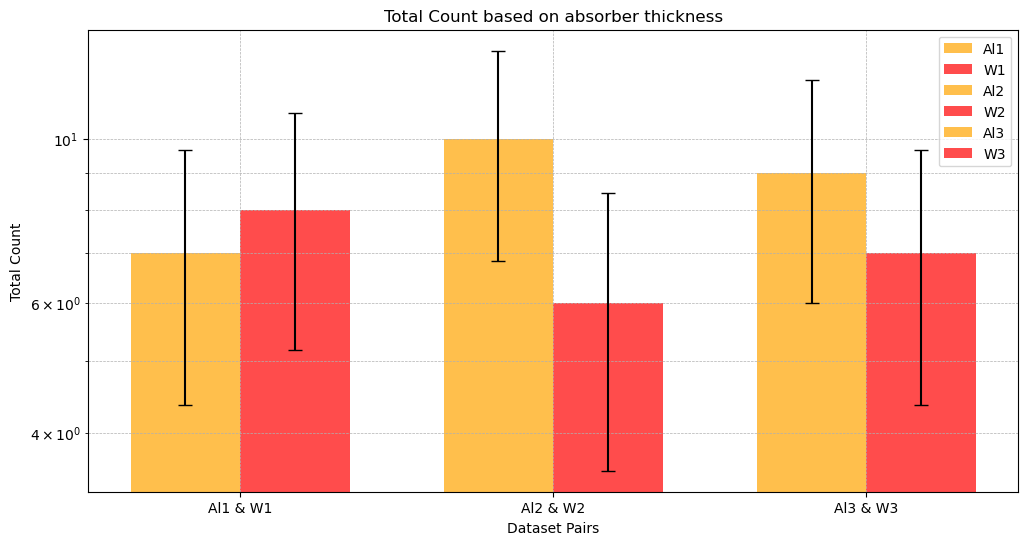

In [4]:
total_counts_dict = {
    'Al1': 7,
    'W1': 8,
    'Al2': 10,
    'W2': 6,
    'Al3': 9,
    'W3': 7
}

dataset_uncertainties = [np.sqrt(total_counts_dict[dataset]) for dataset in ['Al1', 'W1', 'Al2', 'W2', 'Al3', 'W3']]

pairs = [
    ('Al1', 'W1'),
    ('Al2', 'W2'),
    ('Al3', 'W3')
]

pair_counts = [
    (total_counts_dict['Al1'], total_counts_dict['W1']),
    (total_counts_dict['Al2'], total_counts_dict['W2']),
    (total_counts_dict['Al3'], total_counts_dict['W3'])
]

bar_width = 0.35 
index = np.arange(len(pairs)) 

plt.figure(figsize=(12, 6))

for i, (count1, count2) in enumerate(pair_counts):
    plt.bar(index[i] - bar_width / 2, count1, bar_width, label=f'Al{i+1}', yerr=dataset_uncertainties[2*i], capsize=5, color='orange', alpha=0.7)
    plt.bar(index[i] + bar_width / 2, count2, bar_width, label=f'W{i+1}', yerr=dataset_uncertainties[2*i + 1], capsize=5, color='red', alpha=0.7)

plt.yscale('log')

plt.xlabel('Dataset Pairs')
plt.ylabel('Total Count')
plt.title('Total Count based on absorber thickness')
plt.xticks(index, [f'{pair[0]} & {pair[1]}' for pair in pairs])
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

4. Do these graphs follow the trend you expect?
a. Calculate the absorption coefficient in both cases
b. NOTE: there are several ways to do this – you could calculate an estimate for the
coefficient comparing just two points as we did in class or you could draw a line through
the data (plotted on a log scale) and estimate the slope of that line

These are not necessarily the results I expected, there is an increase between Al1 and Al2 despite the increase in thickness in the Aluminum and an increase between W2 and W3 despite there also being an increase. This being the case, I used the W1 and W2 to calculate Tungsten's Absorption Coefficient and Al2 and Al3 to calculate Aluminum's because those tests would give me numbers that make sense.

In [5]:
al_counts = [total_counts_dict['Al1'], total_counts_dict['Al2'], total_counts_dict['Al3']]
w_counts = [total_counts_dict['W1'], total_counts_dict['W2'], total_counts_dict['W3']]
al_thickness = [1, 2, 3]  
w_thickness = [1, 2, 3]   
al_mu_updated = np.log(al_counts[1] / al_counts[2]) / (al_thickness[2] - al_thickness[1])
w_mu_estimate = np.log(w_counts[0] / w_counts[1]) / (w_thickness[1] - w_thickness[0])
print(f"Al Absorption Coefficient: {al_mu_updated:.2f}")
print(f"W Absorption Coefficient: {w_mu_estimate:.2f}")

Al Absorption Coefficient: 0.11
W Absorption Coefficient: 0.29


5. Do this same analysis for the second source. Do you expect the measured absorption coefficients
to be the same? Why might you find differences?
